<a href="https://colab.research.google.com/github/novtryrezki/sarung/blob/main/1CNN_bs_32_ep_40.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import zipfile
import random
import shutil
import numpy as np
import tensorflow as tf
import pandas as pd
from google.colab import drive
from sklearn.model_selection import train_test_split

In [ ]:
# Melakukan mount pada Google Drive
drive.mount('/content/drive')

# Menentukan path file ZIP di Google Drive
zip_path = '/content/drive/MyDrive/images.zip'

# Membuat objek zip_ref
zip_ref = zipfile.ZipFile(zip_path, 'r')

# Mengekstrak file ZIP
extract_path ='/content/images'
zip_ref.extractall(extract_path)

# Tutup objek zip_ref setelah selesai
zip_ref.close()

Mounted at /content/drive


In [ ]:
# Mendefinisikan path direktori dataset
dataset_dir = os.path.join(extract_path, 'images')
train_dir = os.path.join(dataset_dir, 'train')
test_dir = os.path.join(dataset_dir, 'test')
list_train = sorted(os.listdir(train_dir))
list_test = sorted(os.listdir(test_dir))

print("Daftar Angka pada Dataset Train yaitu : ", list_train)
print("Daftar Angka pada Dataset Test yaitu : ", list_test)

Daftar Angka pada Dataset Train yaitu :  ['angka 0', 'angka 1', 'angka 2', 'angka 3', 'angka 4', 'angka 5', 'angka 6', 'angka 7', 'angka 8', 'angka 9']
Daftar Angka pada Dataset Test yaitu :  ['angka 0', 'angka 1', 'angka 2', 'angka 3', 'angka 4', 'angka 5', 'angka 6', 'angka 7', 'angka 8', 'angka 9']


In [ ]:
def count_images(directory):
    return sum(1 for file in os.listdir(directory) if file.endswith(('.jpg', '.jpeg', '.png', '.gif')))

# Menghitung jumlah gambar di data train
train_image_count = sum(count_images(os.path.join(train_dir, angka)) for angka in list_train)

# Menghitung jumlah gambar di data test
test_image_count = sum(count_images(os.path.join(test_dir, angka)) for angka in list_test)

print(f"Jumlah gambar di Dataset Train: {train_image_count}")
print(f"Jumlah gambar di Dataset Test: {test_image_count}")

Jumlah gambar di Dataset Train: 1763
Jumlah gambar di Dataset Test: 445


# Preprocessing

In [ ]:
import cv2

def resize_images(directory, target_resolution):
    for angka in os.listdir(directory):
        angka_dir = os.path.join(directory, angka)
        for file_name in os.listdir(angka_dir):
            file_path = os.path.join(angka_dir, file_name)
            img = cv2.imread(file_path)
            resized_img = cv2.resize(img, (target_resolution, target_resolution))
            cv2.imwrite(file_path, resized_img)

target_resolution = 256
resize_images(train_dir, target_resolution)
resize_images(test_dir, target_resolution)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Membuat generator data dengan augmentasi
image_size = (256, 256)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 90,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    zoom_range = 0.2,
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale'
)

Found 1763 images belonging to 10 classes.
Found 445 images belonging to 10 classes.


# Membuat Model CNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
import math

img_size = 256*256*1

# Perhitungan jumlah neuron pada lapisan tersembunyi
hidden_neurons = int(math.sqrt(img_size * 10))

model1c = Sequential()
model1c.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 1)))
model1c.add(AveragePooling2D((2, 2)))
model1c.add(Conv2D(64, (3, 3), activation='relu'))
model1c.add(AveragePooling2D((2, 2)))
model1c.add(Flatten())
model1c.add(Dense(hidden_neurons, activation='relu'))
model1c.add(Dense(10, activation='softmax'))

model1c.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model1c.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      320       
                                                                 
 average_pooling2d (Average  (None, 127, 127, 32)      0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 average_pooling2d_1 (Avera  (None, 62, 62, 64)        0         
 gePooling2D)                                                    
                                                                 
 flatten (Flatten)           (None, 246016)            0         
                                                                 
 dense (Dense)               (None, 809)               1

In [ ]:
history = model1c.fit(train_generator, epochs=25, verbose = 1)

Epoch 1/25
56/56 [==============================] - 293s 5s/step - loss: 1.6837 - accuracy: 0.4351
Epoch 2/25
56/56 [==============================] - 285s 5s/step - loss: 1.6790 - accuracy: 0.4402
Epoch 3/25
56/56 [==============================] - 287s 5s/step - loss: 1.6345 - accuracy: 0.4492
Epoch 4/25
56/56 [==============================] - 288s 5s/step - loss: 1.6918 - accuracy: 0.4413
Epoch 5/25
56/56 [==============================] - 349s 6s/step - loss: 1.6202 - accuracy: 0.4770
Epoch 6/25
56/56 [==============================] - 329s 6s/step - loss: 1.5991 - accuracy: 0.4736
Epoch 7/25
56/56 [==============================] - 339s 6s/step - loss: 1.5802 - accuracy: 0.4929
Epoch 8/25
56/56 [==============================] - 327s 6s/step - loss: 1.5511 - accuracy: 0.4838
Epoch 9/25
56/56 [==============================] - 299s 5s/step - loss: 1.5378 - accuracy: 0.5026
Epoch 10/25
56/56 [==============================] - 291s 5s/step - loss: 1.5255 - accuracy: 0.5116
Epoch 11/

In [ ]:
from tensorflow.keras.models import load_model
model1c.save('model_first_training.h5')
model1c = load_model('model_first_training.h5')

In [ ]:
history = model1c.fit(train_generator, epochs=10, verbose=1)

Epoch 1/10
56/56 [==============================] - 302s 5s/step - loss: 1.2413 - accuracy: 0.5933
Epoch 2/10
56/56 [==============================] - 299s 5s/step - loss: 1.2379 - accuracy: 0.6137
Epoch 3/10
56/56 [==============================] - 311s 6s/step - loss: 1.2065 - accuracy: 0.6211
Epoch 4/10
56/56 [==============================] - 312s 6s/step - loss: 1.2007 - accuracy: 0.6177
Epoch 5/10
56/56 [==============================] - 317s 6s/step - loss: 1.1673 - accuracy: 0.6273
Epoch 6/10
56/56 [==============================] - 300s 5s/step - loss: 1.1329 - accuracy: 0.6415
Epoch 7/10
56/56 [==============================] - 311s 6s/step - loss: 1.1487 - accuracy: 0.6483
Epoch 8/10
56/56 [==============================] - 297s 5s/step - loss: 1.1221 - accuracy: 0.6341
Epoch 9/10
56/56 [==============================] - 310s 6s/step - loss: 1.1247 - accuracy: 0.6324
Epoch 10/10
56/56 [==============================] - 295s 5s/step - loss: 1.1196 - accuracy: 0.6449


In [ ]:
history = model1c.fit(train_generator, epochs=5, verbose=1)

Epoch 1/5
56/56 [==============================] - 304s 5s/step - loss: 1.0866 - accuracy: 0.6500
Epoch 2/5
56/56 [==============================] - 324s 6s/step - loss: 1.0909 - accuracy: 0.6512
Epoch 3/5
56/56 [==============================] - 320s 6s/step - loss: 1.0656 - accuracy: 0.6676
Epoch 4/5
56/56 [==============================] - 302s 5s/step - loss: 1.0844 - accuracy: 0.6557
Epoch 5/5
56/56 [==============================] - 295s 5s/step - loss: 1.0983 - accuracy: 0.6602


#Matriks Konfusi

14/14 [==============================] - 18s 1s/step


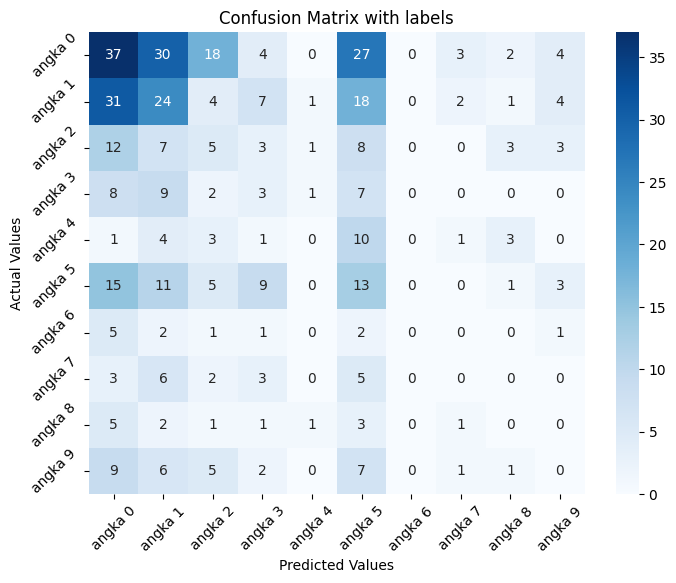

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Fungsi untuk mendapatkan prediksi model dan label sebenarnya
def get_predictions_and_labels(model, data_generator):
    predictions = model.predict(data_generator)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = data_generator.classes
    class_labels = list(data_generator.class_indices.keys())
    return predicted_classes, true_classes, class_labels

# Mendapatkan prediksi dan label sebenarnya untuk data uji
y_pred, y_true, class_labels = get_predictions_and_labels(model1c, test_generator)

# Membuat matriks konfusi
cf_matrix = confusion_matrix(y_true, y_pred)

# Membuat visualisasi matriks konfusi
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', ax=ax)

# Menetapkan label dan judul
ax.set_title('Confusion Matrix with labels')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')

# Menetapkan label pada sumbu x dan y sesuai dengan jenis kelas
ax.xaxis.set_ticklabels(class_labels, rotation=45)
ax.yaxis.set_ticklabels(class_labels, rotation=45)

# Menampilkan visualisasi Matriks Konfusi
plt.show()

In [ ]:
test_loss, test_accuracy = model1c.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy}")

14/14 [==============================] - 18s 1s/step - loss: 1.5576 - accuracy: 0.3888
Test Accuracy: 0.38876405358314514


Akurasi tersebut dihitung berdasarkan batch pertama dari data uji, bukan keseluruhan data uji. Akurasi keseluruhan data uji yaitu   
Accuracy = 82/445  = 18,43%